# NYC Real Estate Sales Scrape

In [2]:
import numpy as np
import pandas as pd
import datetime
from sodapy import Socrata
import urllib
import dill
import future

## Initial Scrape from DOF website

In [1]:
sales_data = {} #this dictionary will hold DF's of sales for each year

#borough lists for urls
boroughs = ['manhattan', 'brooklyn', 'bronx', 'statenisland', 'queens']
boroughs2 = ['manhattan', 'brooklyn', 'bronx', 'si', 'queens']

#Loop through each year and grab data

for year in range(2003,2017):
    print(year)
    
    if(year < 2007):
        currentyear = pd.DataFrame()
        yr = str(year)[2:5]
        
        #for each borough download data and add to each DF
        for borough in boroughs2:
            print(borough)
            
            #Data url
            site = "http://www1.nyc.gov/assets/finance/downloads/sales_" +\
                   borough + "_" + yr + ".xls"
                   
            data = pd.read_excel(site)
            #append to year DF
            currentyear = currentyear.append(data)
        
        #add year to dictionary
        sales_data[year] = currentyear
    
    if(year == 2007):
        
        currentyear = pd.DataFrame()
        
        for borough in boroughs:
            print(borough)
            site = "http://www1.nyc.gov/assets/finance/downloads/excel/rolling_sales/sales_" +\
                   str(year) + "_" + borough + ".xls"
                   
            data = pd.read_excel(site)
            currentyear = currentyear.append(data)
            
        sales_data[year] = currentyear
            
    if (year == 2008):
        
        currentyear = pd.DataFrame()
        
        for borough in boroughs:
            
            site = "http://www1.nyc.gov/assets/finance/downloads/pdf/09pdf/rolling_sales/sales_" +\
                   str(year) + "_" + borough + ".xls"
            data = pd.read_excel(site)
            
            currentyear = currentyear.append(data)
            
        sales_data[year] = currentyear
            
    if(year == 2009): 
        
        currentyear = pd.DataFrame()
        
        for borough in boroughs:
            
            site = "http://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/" +\
                   str(year) + "_" + borough + ".xls"
            data = pd.read_excel(site)
            
            currentyear = currentyear.append(data)
    if(year > 2009): 
        
        currentyear = pd.DataFrame()
        
        for borough in boroughs:
            
            site = "http://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/" +\
                   str(year) + "/" + str(year) + "_" + borough + ".xls"
            data = pd.read_excel(site)
            
            currentyear = currentyear.append(data)
            
    sales_data[year] = currentyear

2003


NameError: name 'pd' is not defined

In [3]:
sales_data[2014].head()

,"BRONX ANNUALIZE SALE FOR 2014. (All Sales From Jan 1, 2014 - Dec 31, 2014)","BROOKLYN ANNUALIZE SALE FOR 2014. (All Sales From Jan 1, 2014 - Dec 31, 2014)","MANHATTAN ANNUALIZE SALE FOR 2014. (All Sales From Jan 1, 2014 - Dec 31, 2014)","QUEENS ANNUALIZE SALE FOR 2014. (All Sales From Jan 1, 2014 - Dec 31, 2014)","STATEN ISLAND ANNUALIZE SALE FOR 2014. (All Sales From Jan 1, 2014 - Dec 31, 2014)",Unnamed: 1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 19,Unnamed: 2,Unnamed: 20,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,Sales File as of 3/31/2015. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Neighborhood Name 1/10/15. Descriptive Data a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,BOROUGH\n,NaN,NaN,NEIGHBORHOOD\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,...,SALE PRICE\n,BUILDING CLASS CATEGORY\n,SALE DATE\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n
4,NaN,NaN,1,NaN,NaN,ALPHABET CITY,10009,1,1,2,...,0,01 ONE FAMILY DWELLINGS,2014-12-05 00:00:00,1,402,42,,S1,96 AVENUE B,


## Clean Data

In [4]:
#Cleaning Sales Data
for key in sales_data.keys():
    if(int(key) < 2011):
        #columns are row 3
        sales_data[key].columns = sales_data[key].iloc[2]
        sales_data[key] = sales_data[key].drop(sales_data[key].index[0:3])
    else:
        #columns are row 4
        sales_data[key].columns = sales_data[key].iloc[3]
        sales_data[key] = sales_data[key].drop(sales_data[key].index[0:4])

#strip white space
for key in sales_data.keys():
        sales_data[key].columns = sales_data[key].columns.str.strip()

#Fix borough dummy columns
for key in sales_data.keys():
    sales_data[key].columns.values[0] = "b1"
    sales_data[key].columns.values[1] = "b2"
    sales_data[key].columns.values[3] = "b3"
    sales_data[key].columns.values[4] = "b4"
    sales_data[key].columns.values[2] = "b5"

cols = ['b1', 'b2', 'b3', 'b4']
for key in sales_data.keys():
    sales_data[key]['Borough'] = sales_data[key][cols].sum(axis = 1)

for key in sales_data.keys():
    sales_data[key]['Borough'] = sales_data[key]['Borough'].fillna(1)
    
columns = ['b1', 'b2', 'b3', 'b4', 'b5']
for key in range(2003, 2017):
        sales_data[key] = sales_data[key].drop(columns, axis = 1)
        

/Users/samgass/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/samgass/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
sales_data[2014].head()

3,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,...,BUILDING CLASS CATEGORY,SALE DATE,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,Borough
4,ALPHABET CITY,10009,1,1,2,1400,1839,1901,1,S1,...,01 ONE FAMILY DWELLINGS,2014-12-05 00:00:00,1,402,42,,S1,96 AVENUE B,,1.0
5,ALPHABET CITY,10002,2,1,3,826,2075,1910,1,S2,...,02 TWO FAMILY DWELLINGS,2014-01-31 00:00:00,1,372,37,,S2,17 AVENUE D,,1.0
6,ALPHABET CITY,10009,3,0,3,2381,3084,1899,1,C0,...,03 THREE FAMILY DWELLINGS,2014-11-26 00:00:00,1,377,66,,C0,243 EAST 7TH STREET,,1.0
7,ALPHABET CITY,10009,8,2,10,2650,7620,1920,2,C7,...,07 RENTALS - WALKUP APARTMENTS,2014-07-18 00:00:00,2B,372,51,,C7,300 EAST 2ND STREET,,1.0
8,ALPHABET CITY,10009,11,0,11,2212,8294,1920,2,C3,...,07 RENTALS - WALKUP APARTMENTS,2014-05-30 00:00:00,2,373,15,,D1,324 EAST 4TH STREET,,1.0


### Load in PLUTO Data

In [6]:
with open('pluto.pkl', 'rb') as file:
    datastruct = dill.load(file)

In [7]:
for key in sales_data.keys():        
    sales_data[key]= sales_data[key].rename(columns = {'LOT':'Lot', 'BLOCK':'Block'})
    sales_data[key]['BOROUGH'] = sales_data[key]['Borough'].astype(int)
    sales_data[key]['Block'] = sales_data[key]['Block'].astype(int)
    sales_data[key]['Lot'] = sales_data[key]['Lot'].astype(int)

for key in pluto_dict.keys():
    pluto_dict[key]['BOROUGH'] = pluto_dict[key]['BoroCode']

In [8]:
#FIX 14 and 16
for year in [2014, 2016]:
    yr = str(year)[2:4]
    pluto_dict[yr]['Zip'] = pluto_dict[yr]['ZipCode'].str.slice(0,5)
    pluto_dict[yr]['full_address'] = pluto_dict[yr]['Address'].str.strip() +\
                                      ", " + pluto_dict[yr]['Zip']
       

    #Fix Census Tracts    
    pluto_dict[yr]['CT2010'] = pluto_dict[yr]['CT2010'].astype(str)
    pluto_dict[yr]['CT2010'] = pluto_dict[yr].apply(lambda row: row['CT2010'] if row['CT2010'][-1] != '0' else row['CT2010'][:-2], axis = 1)
    pluto_dict[yr]['CT2010'] = pluto_dict[yr]['CT2010'].replace('nan', float('NaN'))
    


### Descriptive Stats

In [9]:
#Percent that are residential per year
residential_pct = {}

for year in sales_data.keys():
    residential = len(sales_data[year][(sales_data[year]['TAX CLASS AT TIME OF SALE'] == 1) | \
                                       (sales_data[year]['TAX CLASS AT TIME OF SALE'] == 2)]) /\
                  len(sales_data[year])
    residential_pct[year] = residential 
    
residential_pct

{2003: 0.9357162157597866,
 2004: 0.9237702522296214,
 2005: 0.9034154784338781,
 2006: 0.9042278647637523,
 2007: 0.898868319487146,
 2008: 0.8830570397270343,
 2009: 0.869577971864791,
 2010: 0.8585520597948896,
 2011: 0.8554913294797688,
 2012: 0.8586719948620972,
 2013: 0.863416097983862,
 2014: 0.8723037198236495,
 2015: 0.8712464186514446,
 2016: 0.8988152239271319}

In [10]:
#PCT That have square footage
sqftok = {}

for year in sales_data.keys():
    sqft = len(sales_data[year][sales_data[year]['GROSS SQUARE FEET'] > 0]) / \
           len(sales_data[year])
    sqftok[year] = sqft 
    
sqftok

{2003: 0.6485966156652143,
 2004: 0.6230695705065921,
 2005: 0.5955775903205196,
 2006: 0.5812318137730359,
 2007: 0.5343756132661739,
 2008: 0.5119532184273755,
 2009: 0.5527035135675712,
 2010: 0.58507155686888,
 2011: 0.5074056443386603,
 2012: 0.5125414778606344,
 2013: 0.5117367239424723,
 2014: 0.5269656206659376,
 2015: 0.529460009185749,
 2016: 0.538271384985413}

In [11]:
#PCT of those that have total sale prices over 1000

ov1000 = {}

for year in sales_data.keys():
    df = len(sales_data[year][(sales_data[year]['SALE PRICE'] > 1000) &
                              (sales_data[year]['GROSS SQUARE FEET'] > 0) &
                              ((sales_data[year]['TAX CLASS AT TIME OF SALE'] == 1) | \
                              (sales_data[year]['TAX CLASS AT TIME OF SALE'] == 2))]) / \
         len(sales_data[year][(sales_data[year]['GROSS SQUARE FEET'] > 0) &
                              ((sales_data[year]['TAX CLASS AT TIME OF SALE'] == 1) | \
                              (sales_data[year]['TAX CLASS AT TIME OF SALE'] == 2))])
    ov1000[year] = df 
    
ov1000

{2003: 0.5929380321274075,
 2004: 0.6425850395078679,
 2005: 0.6641045683515719,
 2006: 0.653995049819128,
 2007: 0.6103106109569251,
 2008: 0.5638748786436504,
 2009: 0.5650075003409246,
 2010: 0.5922562674094708,
 2011: 0.5840352865500659,
 2012: 0.5694958249656484,
 2013: 0.607044819628325,
 2014: 0.6229476899579992,
 2015: 0.628650427311366,
 2016: 0.6232650956299468}

In [12]:
#How many buildings sold were residential and had square footage and had sale price over 1000 in each year
usable = {}

for year in sales_data.keys():
    canuse = len(sales_data[year][(sales_data[year]['GROSS SQUARE FEET'] > 0) &
                                  (sales_data[year]['SALE PRICE'] > 1000)     &
                                  ((sales_data[year]['TAX CLASS AT TIME OF SALE'] == 1) | 
                                  (sales_data[year]['TAX CLASS AT TIME OF SALE'] == 2))])
    usable[year] = canuse 
    
usable

{2003: 43039,
 2004: 47737,
 2005: 45879,
 2006: 41220,
 2007: 32106,
 2008: 23813,
 2009: 20716,
 2010: 21262,
 2011: 19067,
 2012: 21552,
 2013: 24989,
 2014: 26104,
 2015: 27511,
 2016: 27797}

## Subset to relevant sales

In [13]:
sales_nocoops = {}

for year in sales_data.keys():
    sales_nocoops[year] = sales_data[year][(sales_data[year]['GROSS SQUARE FEET'] > 0) &
                                  (sales_data[year]['SALE PRICE'] > 1000)     &
                                  ((sales_data[year]['TAX CLASS AT TIME OF SALE'] == 1) | 
                                  (sales_data[year]['TAX CLASS AT TIME OF SALE'] == 2))]
    
    sales_nocoops[year]['PPSF'] = sales_nocoops[year]['SALE PRICE'] / sales_nocoops[year]['GROSS SQUARE FEET']


/Users/samgass/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
for year in sales_nocoops.keys():
    print(len(sales_nocoops[year]))

43039
47737
45879
41220
32106
23813
20716
21262
19067
21552
24989
26104
27511
27797


### Merge with PLUTO

In [16]:
size = 1        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

merged_tracts = {}
for key in range(2004, 2017):
    if(key != 2008 | key < 2011):
        num = str(key)[-2:]
    else: 
        num = '11'
        
    tractname = 'CT2000'
    print(key)
    
    tracts = pluto_dict[num].groupby(['BOROUGH', 'Block'], as_index=False).apply(fn)
    tracts = tracts.loc[:, ['BOROUGH', 'Block', tractname]]
    tracts[tractname] = tracts[tractname].str.strip()

    merged_tracts[key] = pd.merge(sales_nocoops[key], tracts, on = ['BOROUGH', 'Block']) 


2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [17]:
for year in merged_tracts.keys():
    print(len(merged_tracts[year]))

47737
45879
41220
32106
23813
20716
21262
19060
21541
24977
26102
27509
27796


In [19]:
#Missing Tracts?
missing_tracts = {}

for year in merged_tracts.keys():
    
    tractname = 'CT2000'
        
    missing = len(merged_tracts[year][pd.isnull(merged_tracts[year][tractname])])
    missing_tracts[year] = missing

missing_tracts

{2004: 11,
 2005: 6,
 2006: 5,
 2007: 3,
 2008: 6,
 2009: 3,
 2010: 2,
 2011: 6,
 2012: 9,
 2013: 5,
 2014: 6,
 2015: 5,
 2016: 10}

### For tract/year combos with less than 10 sales, sample from neighboring tracts

In [33]:
neighbors = pd.read_csv('adj_tracts.csv', dtype = {'V1': object, 'V2': object, 'V3': object})

neighbors['Btract'] = neighbors['V3'] + " " + neighbors['V1']

neighbor_tracts = {}

for tract in neighbors.Btract.unique():
    neighbor_tracts[tract] = neighbors[neighbors['Btract'] == tract]['V2'].tolist()

In [41]:
for key in merged_tracts.keys():
    merged_tracts[key]['Btract'] = merged_tracts[key]['BOROUGH'].astype(str) + " " + merged_tracts[key]['CT2000']  

In [90]:
#If there is less than 10 samples, populate tract sales from neighboring tracts
for key in merged_tracts.keys():
    print(key)
    year = merged_tracts[key]
    
    for tract in year.Btract.unique():
        if(len(year[year['Btract'] == tract]) < 10):
            
            if tract in neighbor_tracts.keys():
                neigh = neighbor_tracts[tract]
                toadd = year[(year['CT2000'].isin(neigh)) & (year['BOROUGH'] == int(tract[0]))]

                toadd['CT2000'] = tract.rsplit(' ')[1]
                year = year.append(toadd)
            
    merged_tracts[key] = year
            
            
        

2004


/Users/samgass/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [91]:
merged_tracts[2004].head()

,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,...,Lot,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,Borough,BOROUGH,PPSF,CT2000,Btract
0,ALPHABET CITY,10009,2,0,2,1437,4288,1915,1,B9,...,51,,B9,317 EAST 8 STREET,,1.0,1,306.845,26.02,1 26.02
1,ALPHABET CITY,10009,4,1,5,1500,3540,1900,2,S4,...,33,,S4,137 AVENUE C,,1.0,1,418.079,26.02,1 26.02
2,ALPHABET CITY,10009,3,0,3,2381,3084,1899,1,C0,...,66,,C0,243 EAST 7TH STREET,,1.0,1,713.359,26.02,1 26.02
3,ALPHABET CITY,10009,4,0,4,2212,4921,1920,2,C3,...,15,,C3,324 EAST 4 STREET,,1.0,1,355.619,26.01,1 26.01
4,ALPHABET CITY,10009,4,0,4,2084,2917,1900,2,C3,...,63,,C3,285 EAST 3 STREET,,1.0,1,325.677,26.01,1 26.01


In [93]:
sales_by_tract = {}
for key in merged_tracts.keys():
    
    tractname = 'CT2000'

    df = merged_tracts[key]
    df['PPSF'] = df['PPSF'].astype(int)
    grouped = df['PPSF'].groupby([df[tractname], df['BOROUGH']]).describe()
    grouped = pd.DataFrame(grouped)
    grouped['Year'] = key
    grouped['Tract'] = grouped.index
    sales_by_tract[key] = grouped

sales_tract = pd.DataFrame()
for key in sales_by_tract.keys():
    sales_tract = sales_tract.append(sales_by_tract[key])

sales_tract['Tract'] = sales_tract['Tract'].str.strip()
sales_tract.to_csv('sales_tract.csv')

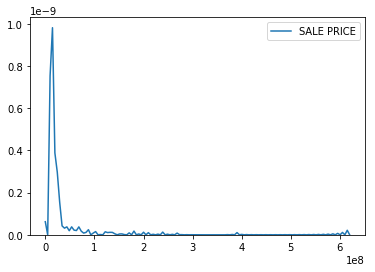

In [85]:
%matplotlib inline
import seaborn as sns

sns.kdeplot(year['SALE PRICE'])

In [93]:
#Check the missing tracts on data before filtering for square footage and price
merged_all = {}
for key in range(2004, 2017):
    if(key != 2008):
        num = str(key)[-2:]
    else: 
        num = '07'
    if key < 2012:
        tractname = 'CT2000'
    else:
        tractname = 'CT2010'
    print(key)
    
    tracts = pluto_dict[num].groupby(['BOROUGH', 'Block'], as_index=False).apply(fn)
    tracts = tracts.loc[:, ['BOROUGH', 'Block', tractname]]

    merged_all[key] = pd.merge(sales_data[key], tracts, on = ['BOROUGH', 'Block']) 


2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [96]:
#SAVE the non filtered data
allsales_by_tract = {}
for key in merged_all.keys():
    print(key)
    if key < 2012:
        tractname = 'CT2000'
    else:
        tractname = 'CT2010'
    
    df = merged_all[key]
    grouped = df['SALE PRICE'].groupby(df[tractname]).describe()
    grouped = pd.DataFrame(grouped)
    grouped['Year'] = key
    grouped['Tract'] = grouped.index
    allsales_by_tract[key] = grouped

allsales_tract = pd.DataFrame()
for key in sales_by_tract.keys():
    allsales_tract = allsales_tract.append(allsales_by_tract[key])
    
allsales_tract.to_csv('allsales_tract.csv')

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
